Inspired/based on https://github.com/rayidghani/magicloops

In [12]:
import pipeline_v2 as pipeline
import importlib
import datetime
import pandas as pd
import numpy as np

# Read data

In [13]:
importlib.reload(pipeline)

data = pd.read_csv('projects_2012_2013.csv')

# Explore data

Data exploration...

Number of rows: 124976

Columns and types of data:
projectid                                  object
teacher_acctid                             object
schoolid                                   object
school_ncesid                             float64
school_latitude                           float64
school_longitude                          float64
school_city                                object
school_state                               object
school_metro                               object
school_district                            object
school_county                              object
school_charter                             object
school_magnet                              object
teacher_prefix                             object
primary_focus_subject                      object
primary_focus_area                         object
secondary_focus_subject                    object
secondary_focus_area                       object
resource_type               

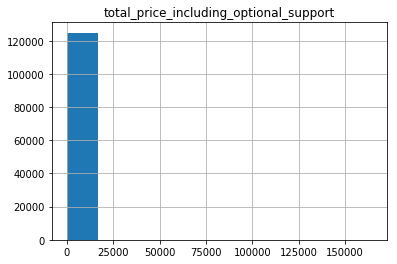

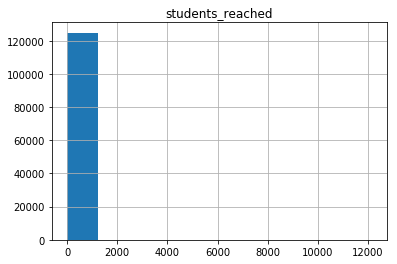

In [14]:
importlib.reload(pipeline)

stats_for_variables = [
  'total_price_including_optional_support',
  'students_reached'
]

variables_for_correlation = [
  'total_price_including_optional_support',
  'students_reached'
]

pipeline.explore_data(data, stats_for_variables, variables_for_correlation)



We can clearly see in the histograms that DebtRadio MontlyIncome have very big outliers.

# Process data

In [24]:
importlib.reload(pipeline)

columns_to_process = [
  'total_price_including_optional_support',
  'students_reached'
]

data = pipeline.pre_process_data(data, columns_to_process)

Pre processing data...
Done


# Create binary features and select predictors

In [31]:
list(data)

['projectid',
 'teacher_acctid',
 'schoolid',
 'school_ncesid',
 'school_latitude',
 'school_longitude',
 'school_city',
 'school_district',
 'school_county',
 'teacher_prefix',
 'secondary_focus_subject',
 'secondary_focus_area',
 'total_price_including_optional_support',
 'students_reached',
 'date_posted',
 'datefullyfunded',
 'school_state_AK',
 'school_state_AL',
 'school_state_AR',
 'school_state_AZ',
 'school_state_CA',
 'school_state_CO',
 'school_state_CT',
 'school_state_DC',
 'school_state_DE',
 'school_state_FL',
 'school_state_GA',
 'school_state_HI',
 'school_state_IA',
 'school_state_ID',
 'school_state_IL',
 'school_state_IN',
 'school_state_KS',
 'school_state_KY',
 'school_state_LA',
 'school_state_MA',
 'school_state_MD',
 'school_state_ME',
 'school_state_MI',
 'school_state_MN',
 'school_state_MO',
 'school_state_MS',
 'school_state_MT',
 'school_state_NC',
 'school_state_ND',
 'school_state_NE',
 'school_state_NH',
 'school_state_NJ',
 'school_state_NM',
 'school_

In [28]:
importlib.reload(pipeline)

cols_to_transform = [
'school_state',
'school_metro',
'school_charter',
'school_magnet',
'primary_focus_subject',
'primary_focus_area',
'resource_type',
'poverty_level',
'grade_level',
'eligible_double_your_impact_match']


data = pipeline.create_dummies(data, cols_to_transform)

KeyError: "['school_state' 'school_metro' 'school_charter' 'school_magnet'\n 'primary_focus_subject' 'primary_focus_area' 'resource_type'\n 'poverty_level' 'grade_level' 'eligible_double_your_impact_match'] not in index"

In [ ]:
selected_features = ['school_state_AK','school_state_AL','school_state_AR','school_state_AZ','school_state_CA','school_state_CO','school_state_CT','school_state_DC','school_state_DE','school_state_FL','school_state_GA','school_state_HI','school_state_IA','school_state_ID','school_state_IL','school_state_IN','school_state_KS','school_state_KY','school_state_LA','school_state_MA','school_state_MD','school_state_ME','school_state_MI','school_state_MN','school_state_MO','school_state_MS','school_state_MT','school_state_NC','school_state_ND','school_state_NE','school_state_NH','school_state_NJ','school_state_NM','school_state_NV','school_state_NY','school_state_OH','school_state_OK','school_state_OR','school_state_PA','school_state_RI','school_state_SC','school_state_SD','school_state_TN','school_state_TX','school_state_UT','school_state_VA','school_state_VT','school_state_WA','school_state_WI','school_state_WV','school_state_WY','school_state_nan','school_metro_rural','school_metro_suburban','school_metro_urban','school_metro_nan','school_charter_f','school_charter_t','school_charter_nan','school_magnet_f','school_magnet_t','school_magnet_nan','primary_focus_subject_Applied Sciences','primary_focus_subject_Character Education','primary_focus_subject_Civics & Government','primary_focus_subject_College & Career Prep','primary_focus_subject_Community Service','primary_focus_subject_ESL','primary_focus_subject_Early Development','primary_focus_subject_Economics','primary_focus_subject_Environmental Science','primary_focus_subject_Extracurricular','primary_focus_subject_Foreign Languages','primary_focus_subject_Gym & Fitness','primary_focus_subject_Health & Life Science','primary_focus_subject_Health & Wellness','primary_focus_subject_History & Geography','primary_focus_subject_Literacy','primary_focus_subject_Literature & Writing','primary_focus_subject_Mathematics','primary_focus_subject_Music','primary_focus_subject_Nutrition','primary_focus_subject_Other','primary_focus_subject_Parent Involvement','primary_focus_subject_Performing Arts','primary_focus_subject_Social Sciences','primary_focus_subject_Special Needs','primary_focus_subject_Sports','primary_focus_subject_Visual Arts','primary_focus_subject_nan','primary_focus_area_Applied Learning','primary_focus_area_Health & Sports','primary_focus_area_History & Civics','primary_focus_area_Literacy & Language','primary_focus_area_Math & Science','primary_focus_area_Music & The Arts','primary_focus_area_Special Needs','primary_focus_area_nan','resource_type_Books','resource_type_Other','resource_type_Supplies','resource_type_Technology','resource_type_Trips','resource_type_Visitors','resource_type_nan','poverty_level_high poverty','poverty_level_highest poverty','poverty_level_low poverty','poverty_level_moderate poverty','poverty_level_nan','grade_level_Grades 3-5','grade_level_Grades 6-8','grade_level_Grades 9-12','grade_level_Grades PreK-2','grade_level_nan','eligible_double_your_impact_match_f','eligible_double_your_impact_match_t','eligible_double_your_impact_match_nan']

# Create binary variable

In [ ]:
importlib.reload(pipeline)

# The task is to predict if a project onprint(sklearn.__version__) donorschoose will not get fully funded within 60 days of posting.

# Change dates to date format
data['datefullyfunded_formated'] = pd.to_datetime(data['datefullyfunded'])
data['date_posted_formated'] = pd.to_datetime(data['date_posted'])

In [ ]:
importlib.reload(pipeline)

from dateutil.relativedelta import relativedelta

#Calculate difference between two dates
data['time_to_fund'] = data['datefullyfunded_formated'].sub(data['date_posted_formated'], axis=0)
got an unexpected keyword argument '

In [ ]:
importlib.reload(pipeline)

data['time_to_fund'] = pd.to_numeric(data['time_to_fund'] / np.timedelta64(1, 'D'))
data['not_funded_in_60'] = np.where(data['time_to_fund']>60, 1, 0)


* Get label (1/4) This problem asks you to predict the project not funded in 60 days, so you should label 1 for the projects not funded in 60 days.

outcome ='not_funded_in_60'


# Create train and test sets

In [ ]:
data['date_posted_formated'].describe()

In [ ]:
importlib.reload(pipeline)

start_time = str(data['date_posted_formated'].describe()['first']).split(" ")[0]
end_time = str(data['date_posted_formated'].describe()['last']).split(" ")[0]
prediction_window = 6
date_column='date_posted_formated'


sets = pipeline.create_temp_validation_train_and_testing_sets(data, 
                                                                   selected_features,
                                                                   outcome,
                                                                   start_time,
                                                                   end_time,
                                                                   prediction_window,
                                                                   date_column)
x_train_1 = sets[0]
x_test_1 = sets[1]
y_train_1 = sets[2]
y_test_1 = sets[3]

x_train_2 = sets[4]
x_test_2 = sets[5]
y_train_2 = sets[6]
y_test_2 = sets[7]

x_train_3 = sets[8]
x_test_3 = sets[9]
y_train_3 = sets[10]
y_test_3 = sets[11]


# Build Clasifiers and parameters generation

In [ ]:
importlib.reload(pipeline)

#We define the specific models we want to run

#Not running BA and KNN because t

* Get label (1/4) This problem asks you to predict the project not funded in 60 days, so you should label 1 for the projects not funded in 60 days.
hey are taking ages
models_to_run=['LR','DT','LR','AB','RF','SVM']#,'BA','KNN']

#Get all posible models and their different sets of parameters
models, parameters_grid = pipeline.get_models_and_parameters()


# Loop over models and different training/test sets

In [26]:
importlib.reload(pipeline)

print("With first train set (biggest one):")
pipeline.iterate_over_models(models_to_run, models, parameters_grid, x_train_1, x_test_1, y_train_1, y_test_1)

With first train set (biggest one):


NameError: name 'x_train_1' is not defined

In [ ]:
print("With second train set:")
pipeline.iterate_over_models(models_to_run, models, parameters_grid, x_train_2, x_test_2, y_train_2, y_test_2)

In [66]:
print("With third train set (smallest one):")
pipeline.iterate_over_models(models_to_run, models, parameters_grid, x_train_3, x_test_3, y_train_3, y_test_3)

With third train set (smalles one):
Running LR...
Running DT...
Running LR...
Running AB...
Running RF...
Running SVM...


/home/felipe/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,model_name,model,parameters,p_at_1,r_at_1,p_at_2,r_at_2,p_at_5,r_at_5,p_at_10,r_at_10,p_at_20,r_at_20,p_at_30,r_at_30,p_at_50,r_at_50,auc-roc
0,LR,"LogisticRegression(C=10, class_weight=None, du...","{'C': 0.001, 'penalty': 'l1'}",1.000000,0.013917,0.694881,0.019352,0.877989,0.061146,0.833401,0.116081,0.815211,0.227095,0.800939,0.334679,0.782331,0.544850,0.592306
1,LR,"LogisticRegression(C=10, class_weight=None, du...","{'C': 0.001, 'penalty': 'l2'}",0.872211,0.012139,0.880892,0.024532,0.875963,0.061005,0.857925,0.119497,0.832489,0.231908,0.819247,0.342329,0.788553,0.549183,0.618635
2,LR,"LogisticRegression(C=10, class_weight=None, du...","{'C': 0.1, 'penalty': 'l1'}",0.864097,0.012026,0.866700,0.024137,0.872112,0.060737,0.858533,0.119582,0.837606,0.233334,0.823368,0.344051,0.791573,0.551287,0.624384
3,LR,"LogisticRegression(C=10, class_weight=None, du...","{'C': 0.1, 'penalty': 'l2'}",0.882353,0.012280,0.872783,0.024306,0.871301,0.060680,0.859141,0.119666,0.838316,0.233531,0.823706,0.344192,0.791999,0.551583,0.625046
4,LR,"LogisticRegression(C=10, class_weight=None, du...","{'C': 1, 'penalty': 'l1'}",0.834686,0.011617,0.855043,0.023812,0.869274,0.060539,0.858330,0.119553,0.838164,0.233489,0.823368,0.344051,0.791695,0.551371,0.624894
5,LR,"LogisticRegression(C=10, class_weight=None, du...","{'C': 1, 'penalty': 'l2'}",0.839757,0.011687,0.856057,0.023840,0.868869,0.060511,0.857925,0.119497,0.837809,0.233390,0.823402,0.344065,0.791289,0.551089,0.624866
6,LR,"LogisticRegression(C=10, class_weight=None, du...","{'C': 10, 'penalty': 'l1'}",0.830629,0.011560,0.854536,0.023798,0.869072,0.060525,0.858026,0.119511,0.838062,0.233461,0.823335,0.344037,0.791451,0.551202,0.624867
7,LR,"LogisticRegression(C=10, class_weight=None, du...","{'C': 10, 'penalty': 'l2'}",0.833671,0.011602,0.855043,0.023812,0.868869,0.060511,0.857722,0.119469,0.837961,0.233433,0.823368,0.344051,0.791411,0.551174,0.624857
8,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'min_sam...",1.000000,0.013917,1.000000,0.027849,1.000000,0.069643,0.711796,0.099143,0.701409,0.195393,0.800939,0.334679,0.880566,0.613265,0.550781
9,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'min_sam...",1.000000,0.013917,1.000000,0.027849,1.000000,0.069643,0.711796,0.099143,0.701409,0.195393,0.800939,0.334679,0.880566,0.613265,0.550781
